In [7]:
import warnings
warnings.filterwarnings('ignore')

In [99]:
import nltk
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

text = None
with open('text.txt', 'r') as f:
    text = f.read()

def add_to_graph(G, node1, node2):
    if node1 > node2:
        tmp = node1
        node1 = node2
        node2 = tmp
    if node1 not in G:
        G.add_node(node1)
        
    if node2 not in G:
        G.add_node(node2)
        
    if node2 not in G[node1]:
        G.add_edge(node1, node2)
        G[node1][node2]['weight'] = 0
    
    G[node1][node2]['weight'] += 1
    

sentences = nltk.sent_tokenize(text)
tokens = [nltk.word_tokenize(sent) for sent in sentences]
tagged = [nltk.pos_tag(sent) for sent in tokens]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/martilad/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/martilad/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/martilad/nltk_data...
[nltk_data]   Package words is already up-to-date!


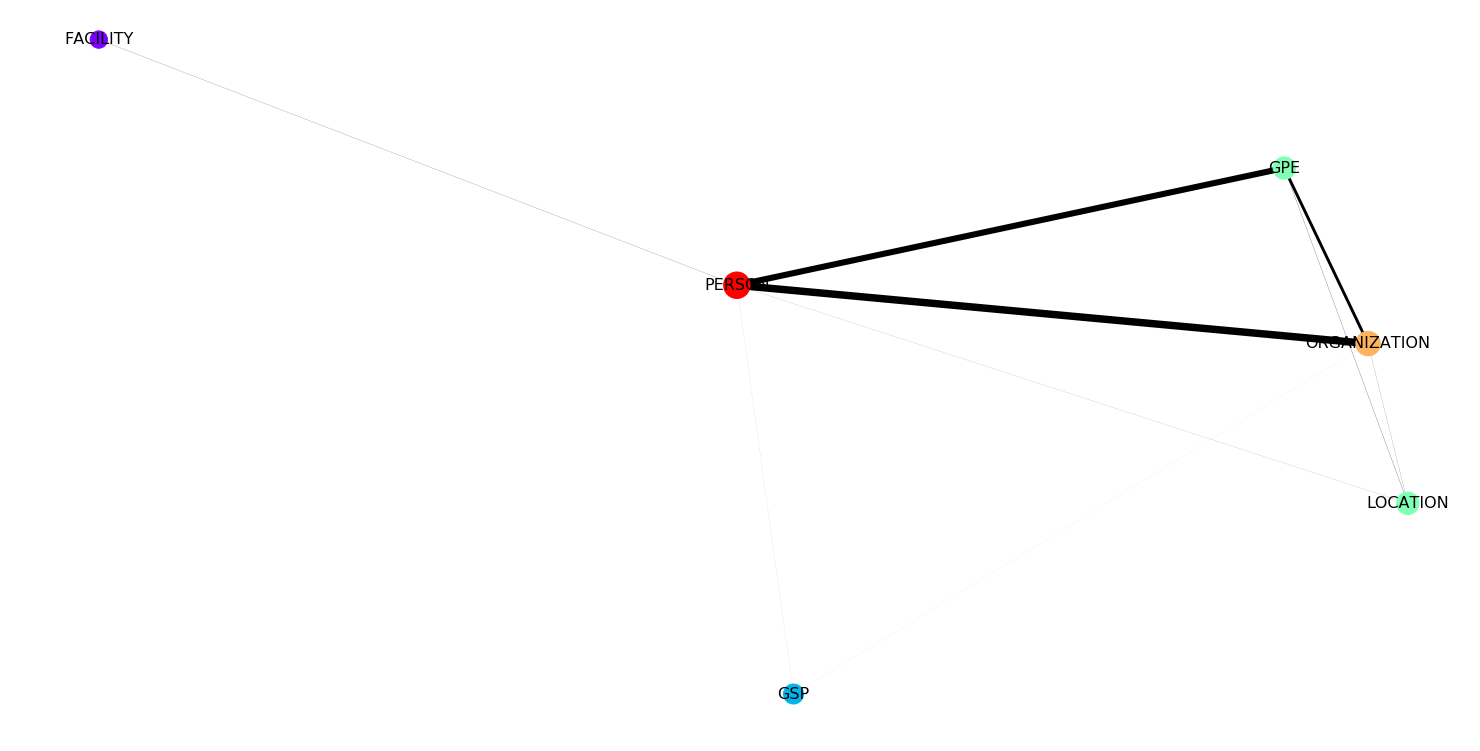

nNodes:  6
nEdges:  15
Graph density:  2.5


In [97]:

def extractEntities(ne_chunked):
    data = {}
    for entity in ne_chunked:
        if isinstance(entity, nltk.tree.Tree):
            text = " ".join([word for word, tag in entity.leaves()])
            ent = entity.label()
            data[text] = ent
        else:
            continue
    return data



#sentences = [[t for t in nltk.word_tokenize(sentence)] for sentence in nltk.sent_tokenize(text)]
G=nx.Graph()
cnt = 0
for x in sentences:
    tokens = nltk.word_tokenize(x)
    tagged = nltk.pos_tag(tokens)
    ne_chunked = nltk.ne_chunk(tagged)
    tmp = extractEntities(ne_chunked)
    for key1, value1 in tmp.items():
        for key2, value2 in tmp.items():
            add_to_graph(G, value1, value2)
    cnt+=1
    if cnt == 5000: 
        break


# visualise
plt.figure(figsize=(20,10))
pos = graphviz_layout(G, prog="fdp")
nx.draw(G, pos,
        labels={v:str(v) for v in G},
        cmap = plt.get_cmap("rainbow"),
        node_color=[G.degree(v) for v in G],
        width = [G[e[0]][e[1]]['weight']/100 for i,e in enumerate(G.edges())],
        node_size=[100*G.degree(v) for v in G],
        font_size=16
       )
plt.show()
print('nNodes: ', len(G))
print('nEdges: ', len(G.edges()))
print('Graph density: ', len(G.edges())/len(G))
# write to GEXF
nx.write_gexf(G, "export.gexf")

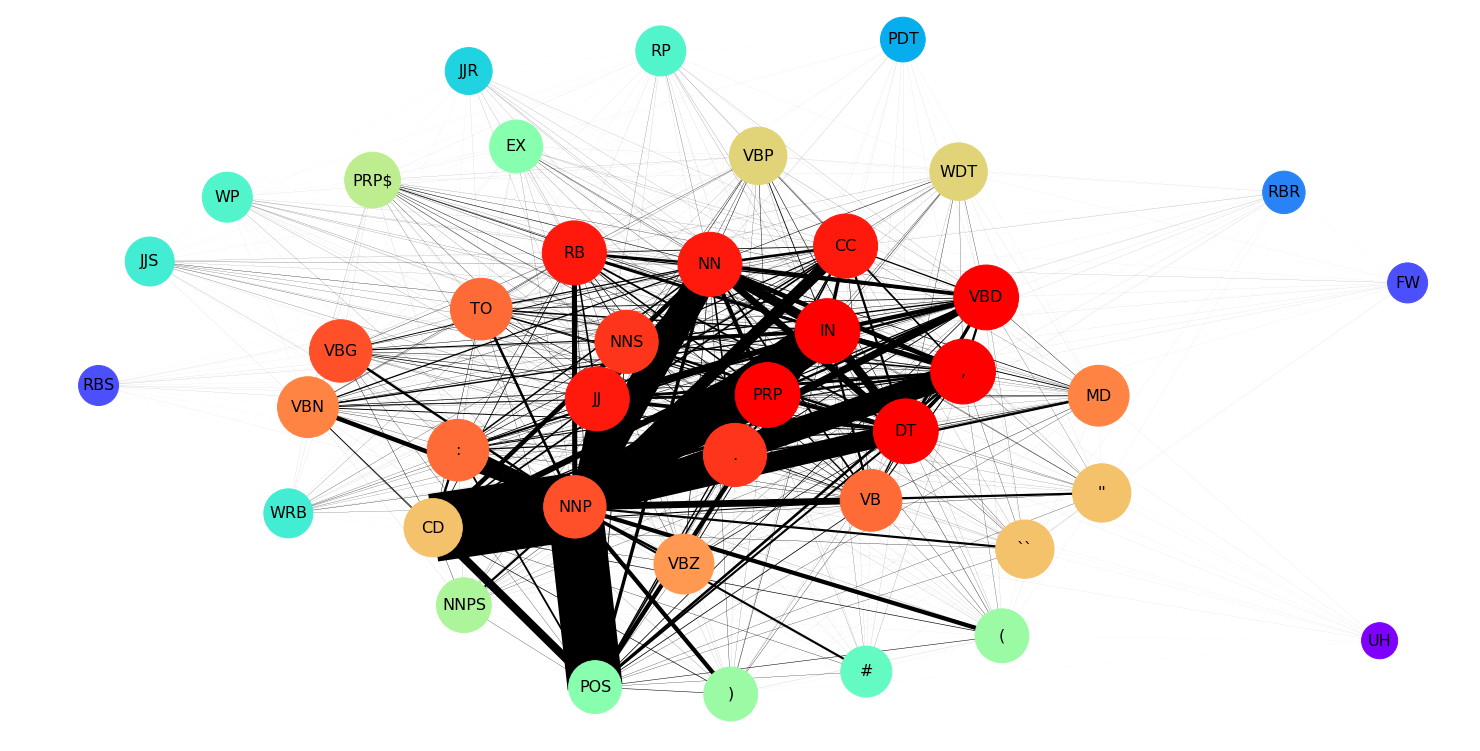

nNodes:  41
nEdges:  664
Graph density:  16.195121951219512


In [102]:
G=nx.Graph()
cnt = 0
for x in tagged:
    for key1, value1 in enumerate(x):
        for key2, value2 in enumerate(x):
            if key1 < key2:
                add_to_graph(G, value1[1], value2[1])
    cnt+=1
    if cnt == 50: 
        break


# visualise
plt.figure(figsize=(20,10))
pos = graphviz_layout(G, prog="fdp")
nx.draw(G, pos,
        labels={v:str(v) for v in G},
        cmap = plt.get_cmap("rainbow"),
        node_color=[G.degree(v) for v in G],
        width = [G[e[0]][e[1]]['weight']/100 for i,e in enumerate(G.edges())],
        node_size=[100*G.degree(v) for v in G],
        font_size=16
       )
plt.show()
print('nNodes: ', len(G))
print('nEdges: ', len(G.edges()))
print('Graph density: ', len(G.edges())/len(G))
# write to GEXF
nx.write_gexf(G, "export.gexf")